In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
words = open('names.txt','r').read().splitlines()

In [3]:
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [4]:
len(words)

32033

In [5]:
min([len(i) for i in words])

2

In [6]:
max([len(i) for i in words])

15

In [7]:
b = {}
for w in words:
    chrs = ['<S>'] + list(w) + ['<E>']
    for ch1,ch2 in zip(chrs,chrs[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram,0) + 1

In [9]:
sorted(b.items(),key=lambda x: -x[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [10]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

In [11]:
N = torch.zeros((28,28), dtype=torch.int32)

In [12]:
for w in words:
    chrs = ['<S>'] + list(w) + ['<E>']
    for ch1,ch2 in zip(chrs,chrs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1

In [13]:
itos = {v:k for k,v in stoi.items()}

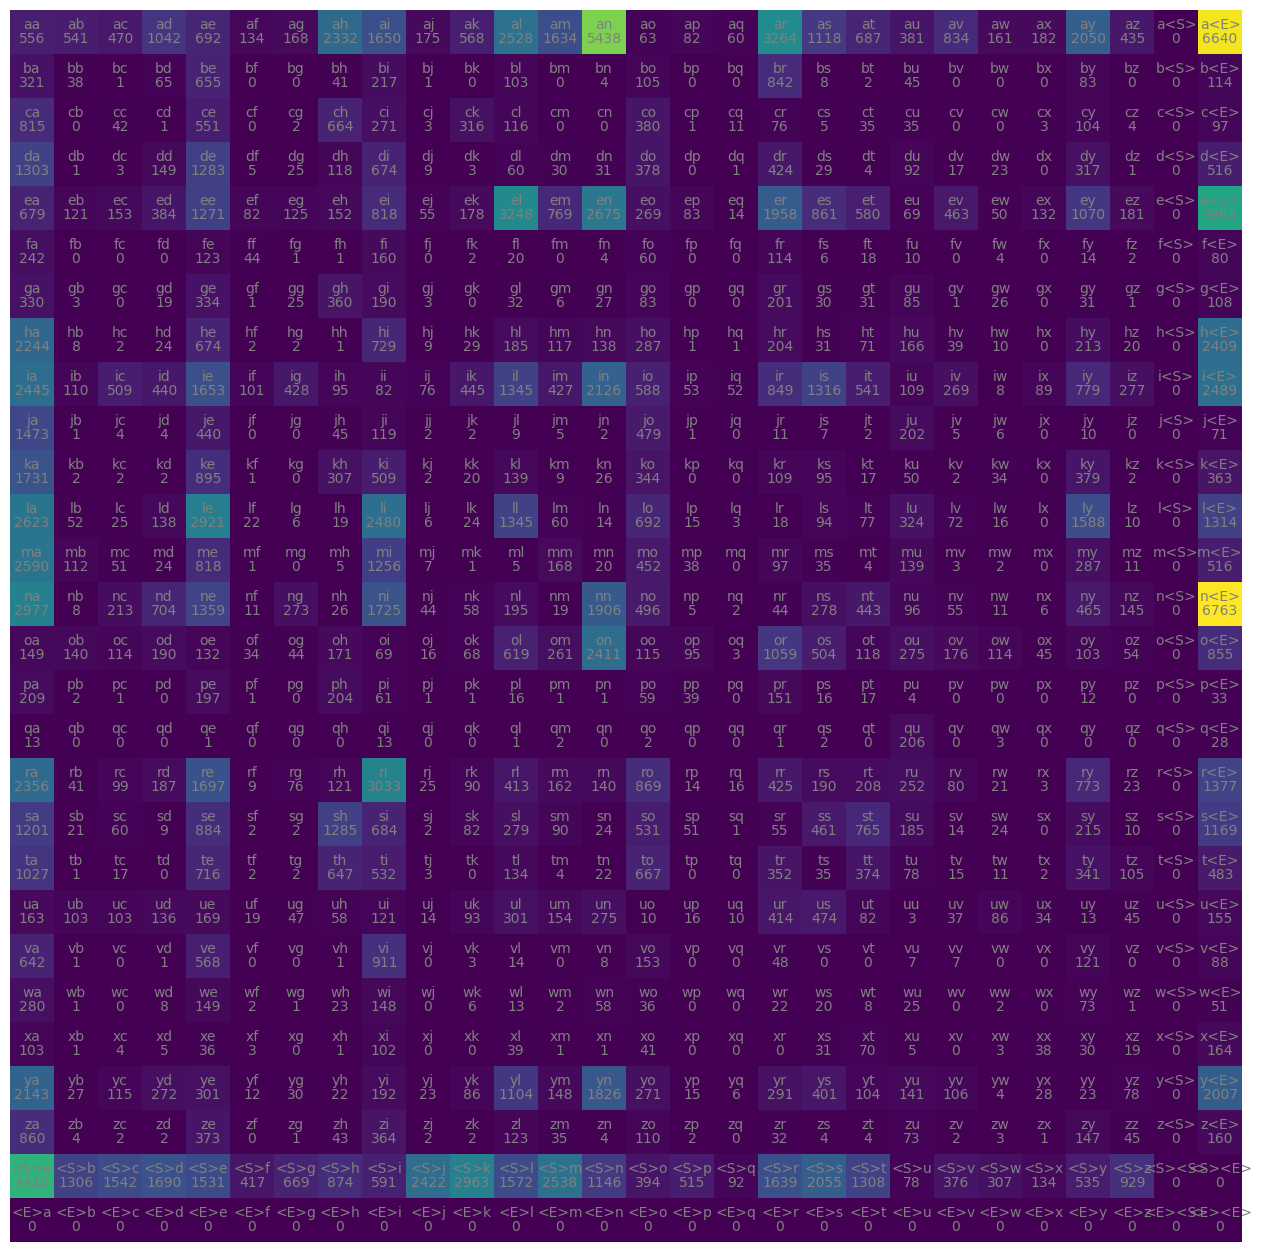

In [14]:
plt.figure(figsize=(16,16))
plt.imshow(N)
for i in range(28):
    for j in range(28):
        charset = itos[i] + itos[j]
        plt.text(j,i,charset,ha='center',va='bottom',color='gray')
        plt.text(j,i,N[i,j].item(),ha='center',va='top',color='gray')
plt.axis('off');

In [15]:
N = torch.zeros((27,27), dtype=torch.int32)

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {v:k for k,v in stoi.items()}

for w in words:
    chrs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chrs,chrs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1
        

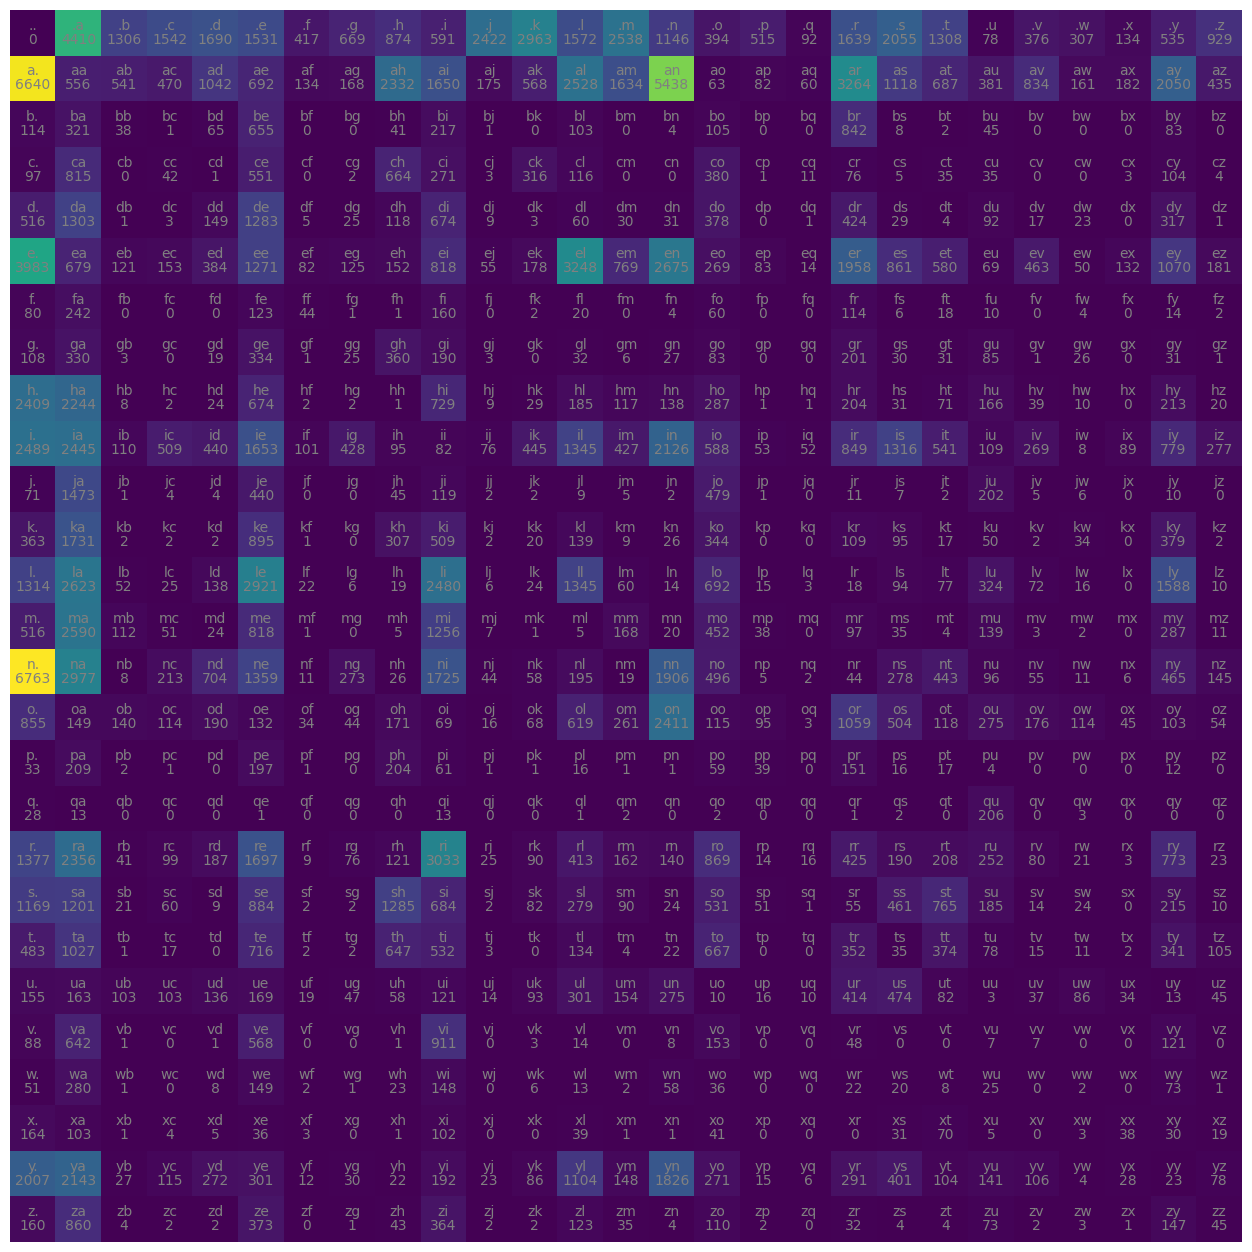

In [16]:
plt.figure(figsize=(16,16))
plt.imshow(N)
for i in range(27):
    for j in range(27):
        charset = itos[i] + itos[j]
        plt.text(j,i,charset,ha='center',va='bottom',color='gray')
        plt.text(j,i,N[i,j].item(),ha='center',va='top',color='gray')
plt.axis('off');

In [17]:
p = N[0]
p = p.float()

In [18]:
g = torch.Generator().manual_seed(12345) ###for getting same results
ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item() ### sampling one item
itos[ix]

's'

In [19]:
g = torch.Generator().manual_seed(2147483647) ###for getting same results, put it outside the loop because it is a generator and produces series of same numbers with some seed.
for i in range(20):
    ix = 0
    out = []
    while True:
        p = N[ix].float()
        p = p/p.sum()
        ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item() ### sampling one item
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
ka.
emimmsade.
enkaviyny.
ftlspihinivenvorhlasu.
dsor.
br.
jol.
pen.
aisan.
ja.


In [20]:
### now we want to make N as P tensor, so computation inside loop is fast.

In [21]:
P = N.float()
P /= P.sum(dim=1,keepdim=True)

In [22]:
P[0].sum()

tensor(1.)

In [23]:
g = torch.Generator().manual_seed(2147483647) ###for getting same results, put it outside the loop because it is a generator and produces series of same numbers with some seed.
for i in range(20):
    ix = 0
    out = []
    while True:
        p = P[ix]
        ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item() ### sampling one item
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
ka.
emimmsade.
enkaviyny.
ftlspihinivenvorhlasu.
dsor.
br.
jol.
pen.
aisan.
ja.


In [24]:
### loss (mean neg log likelihood)

In [25]:
P = (N+1).float()
P/= P.sum(1,keepdim=True)

In [26]:
log_likelihood = 0.0
n=0

for w in words:
    chrs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chrs,chrs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        n+=1
#         print(f'{ch1,ch2}: {prob:.4f} {log_prob:.4f}')
nll = -log_likelihood
mnll = nll/n
print(f'{log_likelihood=}')
print(f'{mnll=}')

log_likelihood=tensor(-559951.5625)
mnll=tensor(2.4544)


In [27]:
## training set for bigram

In [28]:
xs, ys = [],[]
for w in words:
    chrs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chrs,chrs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [29]:
xs

tensor([ 0,  5, 13,  ..., 25, 26, 24])

In [30]:
ys

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [31]:
### one hot encoding

In [32]:
import torch.nn.functional as F

In [33]:
xenc = F.one_hot(xs,num_classes=27).float()

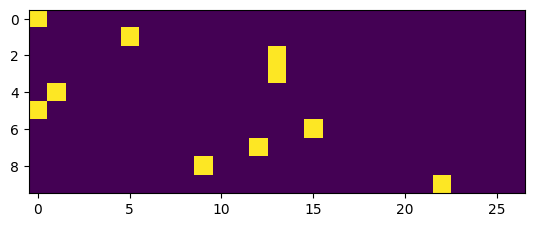

In [34]:
plt.imshow(xenc[:10])

In [35]:
xenc.dtype

torch.float32

In [36]:
W = torch.randn(27,27) ### 1st layer take 27 input with 27 neurons

In [37]:
(xenc @ W).shape ### matrix multiplication

torch.Size([228146, 27])

In [38]:
logits = xenc @ W
counts = logits.exp()
probs = counts/counts.sum(1,keepdims=True)

In [39]:
probs

tensor([[0.0205, 0.0567, 0.0555,  ..., 0.0156, 0.0029, 0.0364],
        [0.1203, 0.0126, 0.0074,  ..., 0.0387, 0.1070, 0.0531],
        [0.0172, 0.0516, 0.1447,  ..., 0.0092, 0.0279, 0.0237],
        ...,
        [0.0087, 0.0029, 0.0016,  ..., 0.0164, 0.0031, 0.0075],
        [0.0358, 0.0496, 0.0019,  ..., 0.0061, 0.0117, 0.0237],
        [0.0064, 0.0208, 0.0279,  ..., 0.1004, 0.0316, 0.0484]])

In [40]:
probs.shape

torch.Size([228146, 27])

In [41]:
probs.sum(1)

tensor([1., 1., 1.,  ..., 1., 1., 1.])

In [42]:
#### for same W every time
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g)

In [43]:
nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item()
    y = ys[i].item()
    print('-----------')
    print(f'output from NN is {probs[i]}')
    print(f'x and y are {itos[x],itos[y]} with index {x}, {y}')
    p = probs[i,y]
    print(f'probability assigned to the actual next character is {p.item()}')
    nlls[i] = -torch.log(p)
    print(f'negative log likelihood is {nlls[i]}')
    
print('==========')
print(f'average negative log likelihood loss is {nlls.mean()}')

-----------
output from NN is tensor([0.0205, 0.0567, 0.0555, 0.0224, 0.0066, 0.0096, 0.0318, 0.0015, 0.0047,
        0.0162, 0.0024, 0.0208, 0.0176, 0.0418, 0.2480, 0.1081, 0.0377, 0.0372,
        0.0277, 0.0471, 0.0506, 0.0196, 0.0121, 0.0490, 0.0156, 0.0029, 0.0364])
x and y are ('.', 'e') with index 0, 5
probability assigned to the actual next character is 0.00956190936267376
negative log likelihood is 4.649967670440674
-----------
output from NN is tensor([0.1203, 0.0126, 0.0074, 0.0444, 0.0174, 0.0620, 0.0441, 0.0367, 0.0057,
        0.0326, 0.0627, 0.0357, 0.0381, 0.0352, 0.0216, 0.0271, 0.0057, 0.0181,
        0.0142, 0.0182, 0.0366, 0.0208, 0.0322, 0.0517, 0.0387, 0.1070, 0.0531])
x and y are ('e', 'm') with index 5, 13
probability assigned to the actual next character is 0.03523201495409012
negative log likelihood is 3.3458001613616943
-----------
output from NN is tensor([0.0172, 0.0516, 0.1447, 0.0281, 0.0627, 0.0595, 0.0138, 0.0074, 0.0196,
        0.0577, 0.0583, 0.1461, 

In [44]:
xs = xs[:5]
ys = ys[:5]

In [45]:
probs.shape

torch.Size([228146, 27])

In [62]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

In [66]:
xenc = F.one_hot(xs,num_classes=27).float()
logits = xenc @ W
counts = logits.exp()
probs = counts/ counts.sum(1,keepdims=True)
loss = -probs[:,ys].log().mean()

In [67]:
W.grad = None
loss.backward()

In [68]:
### repeat

for i in range(50):
    xenc = F.one_hot(xs,num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts/ counts.sum(1,keepdims=True)
    loss = -probs[:,ys].log().mean()
    print(f'epoch {i}, loss {loss}')
    
    W.grad = None
    loss.backward()
    
    W.data += -0.1 *W.grad

epoch 0, loss 3.5987420082092285
epoch 1, loss 3.591034173965454
epoch 2, loss 3.5833466053009033
epoch 3, loss 3.5756800174713135
epoch 4, loss 3.5680344104766846
epoch 5, loss 3.5604088306427
epoch 6, loss 3.552804470062256
epoch 7, loss 3.5452208518981934
epoch 8, loss 3.53765869140625
epoch 9, loss 3.5301172733306885
epoch 10, loss 3.5225963592529297
epoch 11, loss 3.5150976181030273
epoch 12, loss 3.5076186656951904
epoch 13, loss 3.500162124633789
epoch 14, loss 3.4927263259887695
epoch 15, loss 3.4853122234344482
epoch 16, loss 3.477919340133667
epoch 17, loss 3.470547676086426
epoch 18, loss 3.463197946548462
epoch 19, loss 3.455869674682617
epoch 20, loss 3.4485626220703125
epoch 21, loss 3.4412777423858643
epoch 22, loss 3.434014081954956
epoch 23, loss 3.426772356033325
epoch 24, loss 3.4195525646209717
epoch 25, loss 3.4123547077178955
epoch 26, loss 3.4051785469055176
epoch 27, loss 3.398024559020996
epoch 28, loss 3.390892267227173
epoch 29, loss 3.383782148361206
epoch 3

In [69]:
#### from start

In [8]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [9]:
words = open('names.txt','r').read().splitlines()

In [10]:
N = torch.zeros((27,27), dtype=torch.int32)

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {v:k for k,v in stoi.items()}

    
xs, ys = [],[]
for w in words:
    chrs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chrs,chrs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print(f'number of exaples: {num}')

number of exaples: 228146


In [11]:
### initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

In [12]:
for i in range(50):
    ### froward pass
    xenc = F.one_hot(xs,num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts/ counts.sum(1,keepdims=True)
    loss = -probs[torch.arange(num),ys].log().mean()
    print(f'epoch {i}, loss {loss}')
    
    ### backward pass
    W.grad = None
    loss.backward()
    
    ### update params
    W.data += -50 *W.grad

epoch 0, loss 3.758953332901001
epoch 1, loss 3.371100664138794
epoch 2, loss 3.154043197631836
epoch 3, loss 3.020373821258545
epoch 4, loss 2.927711248397827
epoch 5, loss 2.8604021072387695
epoch 6, loss 2.8097290992736816
epoch 7, loss 2.7701022624969482
epoch 8, loss 2.7380728721618652
epoch 9, loss 2.711496591567993
epoch 10, loss 2.6890032291412354
epoch 11, loss 2.6696884632110596
epoch 12, loss 2.65293025970459
epoch 13, loss 2.638277292251587
epoch 14, loss 2.6253881454467773
epoch 15, loss 2.613990545272827
epoch 16, loss 2.60386323928833
epoch 17, loss 2.5948216915130615
epoch 18, loss 2.5867116451263428
epoch 19, loss 2.579403877258301
epoch 20, loss 2.572789192199707
epoch 21, loss 2.5667760372161865
epoch 22, loss 2.5612881183624268
epoch 23, loss 2.5562589168548584
epoch 24, loss 2.551633596420288
epoch 25, loss 2.547365665435791
epoch 26, loss 2.5434155464172363
epoch 27, loss 2.5397486686706543
epoch 28, loss 2.5363364219665527
epoch 29, loss 2.5331544876098633
epoch 

In [16]:
###       notes
#   We can introduce the regularization in Loss function 
#   Increasing the regularization parameter Lambda in loss function is acheiving the 
#   same thing as Label smoothing was acheiving when we were adding 1 to the N in bigram model
#   It makes the curve more uniform by making W more close to 0. (probs will be uniform)

In [27]:
# sampling from the NN
g = torch.Generator().manual_seed(123)

for i in range(5):
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]),num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts/counts.sum(1,keepdims=True)
        
        ix = torch.multinomial(p,num_samples=1,generator=g).item()
        out.append(itos[ix])
        if ix==0:
            break
    print(''.join(out))

ayl.
eeieyhviannmonind.
pyuouyra.
jadererrdyanaya.
kseli.


In [28]:
counts.shape

torch.Size([1, 27])

In [29]:
ix

0

In [30]:
counts

tensor([[6.9670, 6.8431, 0.3449, 1.3877, 1.1971, 4.6140, 0.3222, 1.1312, 0.3311,
         0.3082, 0.2779, 1.2013, 3.7467, 1.1186, 5.9454, 1.5998, 0.2808, 0.2790,
         2.3487, 3.6650, 1.4779, 0.3621, 0.7296, 0.1490, 0.3086, 2.1510, 0.7123]],
       grad_fn=<ExpBackward0>)